In [1]:
!apt-get -qq install xxd

In [2]:
# !git clone https://github.com/onnx/onnx-tensorflow.git && cd onnx-tensorflow && pip install -e .
# import sys
# sys.path.append("./onnx-tensorflow")

In [3]:
!sudo apt-get -y update
!sudo apt-get -y install python3-pip
!sudo apt-get -y install python-is-python3
!wget https://github.com/PINTO0309/onnx2tf/releases/download/1.16.31/flatc.tar.gz \
  && tar -zxvf flatc.tar.gz \
  && sudo chmod +x flatc \
  && sudo mv flatc /usr/bin/
!pip install -U pip \
  && pip install tensorflow==2.17.0 \
  && pip install -U onnx==1.16.1 \
  && python -m pip install onnx_graphsurgeon \
        --index-url https://pypi.ngc.nvidia.com \
  && pip install -U onnxruntime==1.18.1 \
  && pip install -U onnxsim==0.4.33 \
  && pip install -U simple_onnx_processing_tools \
  && pip install -U onnx2tf \
  && pip install -U protobuf==3.20.3 \
  && pip install -U h5py==3.11.0 \
  && pip install -U psutil==5.9.5 \
  && pip install -U ml_dtypes==0.3.2 \
  && pip install -U tf-keras~=2.16 \
  && pip install flatbuffers>=23.5.26

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease


## Prepare dataset for this Demo


In [4]:
import os
import random
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


def load_data(split, dataset_name, datadir, translation=False):
    ## https://gist.github.com/weiaicunzai/e623931921efefd4c331622c344d8151
    if dataset_name == 'MNIST':
        normalize = transforms.Normalize(mean=[0.1307], std=[0.3081])
        tr_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor(), normalize])
        val_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor(), normalize])
    if dataset_name == 'FashionMNIST':
        normalize = transforms.Normalize(mean=[0.5], std=[0.5])
        tr_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor(), normalize])
        val_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor(), normalize])
    get_dataset = getattr(datasets, dataset_name)
    if split == 'train':
        dataset = get_dataset(root=datadir, train=True, download=True, transform=tr_transform)
    else:
        dataset = get_dataset(root=datadir, train=False, download=True, transform=val_transform)
    return dataset

In [5]:
num_classes = 10
num_channels = 1
train_dataset = load_data("train", "MNIST", "dataset")
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataset = load_data("test", "MNIST", "dataset")
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14554870.57it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 503986.58it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4403410.85it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10607198.65it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [6]:
# prompt: 实现代码，输出标签字符与编号的关系

# Assuming your dataset has a class_to_idx attribute (common in PyTorch datasets)
class_to_idx = train_dataset.class_to_idx

# Reverse the dictionary to get the mapping from index to class
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Print the mapping
print("Label Character to Number Mapping:")
for idx, label in idx_to_class.items():
  print(f"Label: {label}, Index: {idx}")


Label Character to Number Mapping:
Label: 0 - zero, Index: 0
Label: 1 - one, Index: 1
Label: 2 - two, Index: 2
Label: 3 - three, Index: 3
Label: 4 - four, Index: 4
Label: 5 - five, Index: 5
Label: 6 - six, Index: 6
Label: 7 - seven, Index: 7
Label: 8 - eight, Index: 8
Label: 9 - nine, Index: 9


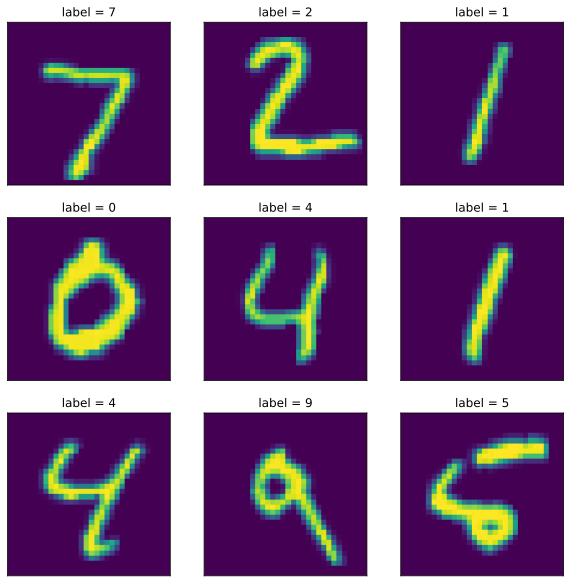

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    img,label = test_dataset[i]
    img = img.permute(1,2,0)
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.cpu().numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [8]:
# img.shape

## Define a simple model

In [9]:
from torch import nn


class LeNet(nn.Module):
    def __init__(self, num_classes=10, num_channels=1):
        super(LeNet, self).__init__()
        self.con_block = nn.Sequential(
            # 3x32x32
            nn.Conv2d(in_channels=num_channels, out_channels=4, kernel_size=5, stride=1),
            # 4x28x28
            nn.ReLU(),
            nn.MaxPool2d(2),
            # 4x14x14
            nn.Conv2d(in_channels=4, out_channels=12, kernel_size=5, stride=1),
            # 12x10x10
            nn.ReLU(),
            nn.MaxPool2d(2),
            # 12x5x5

        )

        self.fc = nn.Sequential(
            nn.Flatten(1),
            nn.Linear(in_features=12 * 5 * 5, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=num_classes),
        )


    def forward(self, x):
        x = self.con_block(x)
        x = self.fc(x)

        return x

## Define Training helpers

In [10]:
from tqdm import tqdm
import random
import torch
import torchvision.transforms.functional as TF
def train(train_loader, model, criterion, optimizer, epoch, device):
    model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader, "Training"):
    # for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()


    train_accuracy = 100 * train_correct / train_total
    avg_train_loss = train_loss / len(train_loader)

def test(test_loader, model, criterion, optimizer, epoch, device):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():
      for inputs, labels in tqdm(test_loader, "testing"):
          inputs = inputs.to(device)
          labels = labels.to(device)

          outputs = model(inputs)

          loss = criterion(outputs, labels)
          test_loss += loss.item()

          _, predicted = outputs.max(1)
          test_total += labels.size(0)
          test_correct += (predicted == labels).sum().item()


      test_accuracy = 100 * test_correct / test_total
      avg_test_loss = test_loss / len(test_loader)
      print(f"Epoch {epoch+1}, Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%\n")
      return test_accuracy/100


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = LeNet(num_classes=num_classes, num_channels=num_channels).to(device)
print(model)

lr = 2e-3
epochs = 10
criterion = nn.CrossEntropyLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
  train(train_loader, model, criterion, optimizer, epoch, device)
  test_accuracy = test(test_loader, model, criterion, optimizer, epoch, device)



cuda
LeNet(
  (con_block): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 12, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=300, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)


testing: 100%|██████████| 40/40 [00:02<00:00, 15.06it/s]


Epoch 1, Loss: 0.1308, Test Accuracy: 95.83%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.12it/s]


Epoch 2, Loss: 0.0811, Test Accuracy: 97.40%



testing: 100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Epoch 3, Loss: 0.0503, Test Accuracy: 98.42%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.18it/s]


Epoch 4, Loss: 0.0471, Test Accuracy: 98.51%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.23it/s]


Epoch 5, Loss: 0.0430, Test Accuracy: 98.52%



testing: 100%|██████████| 40/40 [00:03<00:00, 12.06it/s]


Epoch 6, Loss: 0.0595, Test Accuracy: 97.93%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.08it/s]


Epoch 7, Loss: 0.0457, Test Accuracy: 98.42%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.45it/s]


Epoch 8, Loss: 0.0367, Test Accuracy: 98.76%



testing: 100%|██████████| 40/40 [00:02<00:00, 13.95it/s]


Epoch 9, Loss: 0.0409, Test Accuracy: 98.48%



testing: 100%|██████████| 40/40 [00:02<00:00, 15.27it/s]

Epoch 10, Loss: 0.0376, Test Accuracy: 98.75%



## Model Conversion : pytorch->ONNX->TFLite

In [12]:
import onnx
from onnx import helper

In [13]:
dummy_input = torch.randn(1, 1, 32, 32, dtype=torch.float32)
torch.onnx.export(
        model=model.cpu(),
        args=dummy_input,
        f="model.onnx",
        verbose=False,
        export_params=True,
        do_constant_folding=False,
        input_names=['input'],
        opset_version=11,
        output_names=['output'])
print('ONNX model successfully converted')
onnx_model = onnx.load("model.onnx")

# add softmax # As in the defined LeNet, we do not explicitly add SoftMax to model.
last_node_output = onnx_model.graph.node[-1].output[0]
softmax_input = [last_node_output]

softmax_output = last_node_output + "_softmax"
softmax_node = helper.make_node(
    "Softmax",
    inputs=softmax_input,
    outputs=[softmax_output],
    axis=1
)
onnx_model.graph.node.append(softmax_node)
onnx_model.graph.output[0].name = softmax_output
onnx.save(onnx_model, "model.onnx")
# add softmax

onnx.checker.check_model(onnx_model)


ONNX model successfully converted


In [14]:
!onnx2tf -i model.onnx  -v info


Model optimizing started ============================================================
Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃            ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Constant   │ 8              │ 8                │
│ Conv       │ 2              │ 2                │
│ Flatten    │ 1              │ 1                │
│ Gemm       │ 2              │ 2                │
│ MaxPool    │ 2              │ 2                │
│ Relu       │ 3              │ 3                │
│ Softmax    │ 1              │ 1                │
│ Model Size │ 45.9KiB        │ 46.5KiB          │
└────────────┴────────────────┴──────────────────┘

Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃            ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Constant   │ 8              │ 8                │
│ 

In [15]:
!cp saved_model/model_float32.tflite model.tflite

In [16]:
!xxd -i model.tflite > model.h

In [17]:
!tail -n1 model.h

unsigned int model_tflite_len = 48456;


## Test TFLite model

In [31]:
import numpy as np
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']



def test_tflite_on_onebatch(inputs, labels):
    correct_predictions = 0
    total_predictions = 0
    for i in range(len(inputs)):
      # test_sample = np.array(X_test[i][:3], dtype=np.float32).reshape(input_shape)
      # expected_output = y_test[i]
      test_sample = inputs[i].unsqueeze(-1)
      expected_output = labels[i]


      interpreter.set_tensor(input_details[0]['index'], test_sample)
      interpreter.invoke()
      output_data = interpreter.get_tensor(output_details[0]['index'])
      predicted_output = np.argmax(output_data)

      if predicted_output == expected_output:
          correct_predictions += 1
      total_predictions += 1

    accuracy = correct_predictions / total_predictions * 100
    # print(f"Model Accuracy: {accuracy:.2f}%")
    return accuracy

tflite_test_acc_list=[]
# test_accuracy = test(test_loader, model, criterion, optimizer, epoch, device, angle=angle)
for images, labels in test_loader:
    test_accuracy = test_tflite_on_onebatch(images, labels)
    tflite_test_acc_list.append(test_accuracy)

print(np.mean(tflite_test_acc_list))




98.779296875


## Sample Data

In [32]:

random_idx = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[random_idx]
print(f"Label = {label}")
image_array = image.numpy()
image_array = np.squeeze(image_array)
image_list = image_array.flatten().tolist()

Label = 5


In [33]:
c_array_str = ", ".join([str(pixel) for pixel in image_list])

In [34]:
c_array_formatted = f"const float input_data[] = {{\n  {c_array_str}\n}};"

file_path = "data.h"
with open(file_path, 'w') as file:
    file.write(c_array_formatted)

file_path


'data.h'

> Please put `data.h` to arduino folder.